Domain – Price Prediction

Overview - Congratulations!!!! for making it so far.  This is theCertificationProject forData with Python Certification Course here we will use all the concepts learnedso far in this course.

Context - Riding the digital wave, India's used car market is set to grow at a compounded annual growth of 11% and is likely to touch sales of up to 8.3 million units by FY26 as more.

people have been opting for pre-ownedcars for personal mobility in the pandemic amid the ongoing supply shortages for manufacturing new cars

The used car market in the country is expected to reach over 70 lakh vehicles by

2025-26, up from 38 lakh in 2020-21 as the Covid-19 pandemic, digitalization, changing demographics and aspirations, first-time buyers,and availability of financing options are acting as growth drivers, according to a report by OLX Autos and rating agency Crisil.

"MyCars" is a new-agestartup laying foundations in the setting up a car resell domain and they are setting up a team of ML experts to make predictive models determine

the price of second-handcars tooptimize their revenue, you have joined as a new Data Scientist and your role is to create a model to determine the selling price of a used car.

Objective:

●Provide the best-performing model to determine the price of the used car.
●Providing the most important features which determine the price

Data Description - 
The data provided consists of the following Data Dictionary

● Id: Unique ID assigned to a specific car.
● year: Manufacture year of the car.
● brand: Brand of the car.
● full_model_name: Model name includes other details such as engine capacity, transmission,etc., basically a detailed model name.
● model_name: Just the model name of the car.
● price: Sell price of the 2nd ownership car.
● distance_travelled(km): Distance traveled by car.
● fuel_type : Fuel engine type 
● city: City where the car is registered.
● car_age: Age of the car

Steps and Tasks:

● Import libraries and load dataset
● Exploratory Data Analysis: Univariate Analysis to understand the distribution of features.○Multivariate analysis to determine correlations.
● Layout regression experiment space.
● Publish the performance of all the models on the same hold-out/ test dataset.
● List out the most important features determining the price of used cars.

                Id         year         price  distance_travelled(kms)  \
count  1725.000000  1725.000000  1.725000e+03              1725.000000   
mean    862.000000  2015.390725  1.494837e+06             53848.256232   
std     498.108924     3.207504  1.671658e+06             44725.541963   
min       0.000000  1990.000000  6.250000e+04               350.000000   
25%     431.000000  2013.000000  5.450000e+05             29000.000000   
50%     862.000000  2016.000000  8.750000e+05             49000.000000   
75%    1293.000000  2018.000000  1.825000e+06             70500.000000   
max    1724.000000  2021.000000  1.470000e+07            790000.000000   

        brand_rank      car_age  
count  1725.000000  1725.000000  
mean     15.731014     5.609275  
std      12.951122     3.207504  
min       1.000000     0.000000  
25%       5.000000     3.000000  
50%      14.000000     5.000000  
75%      24.000000     8.000000  
max      81.000000    31.000000  


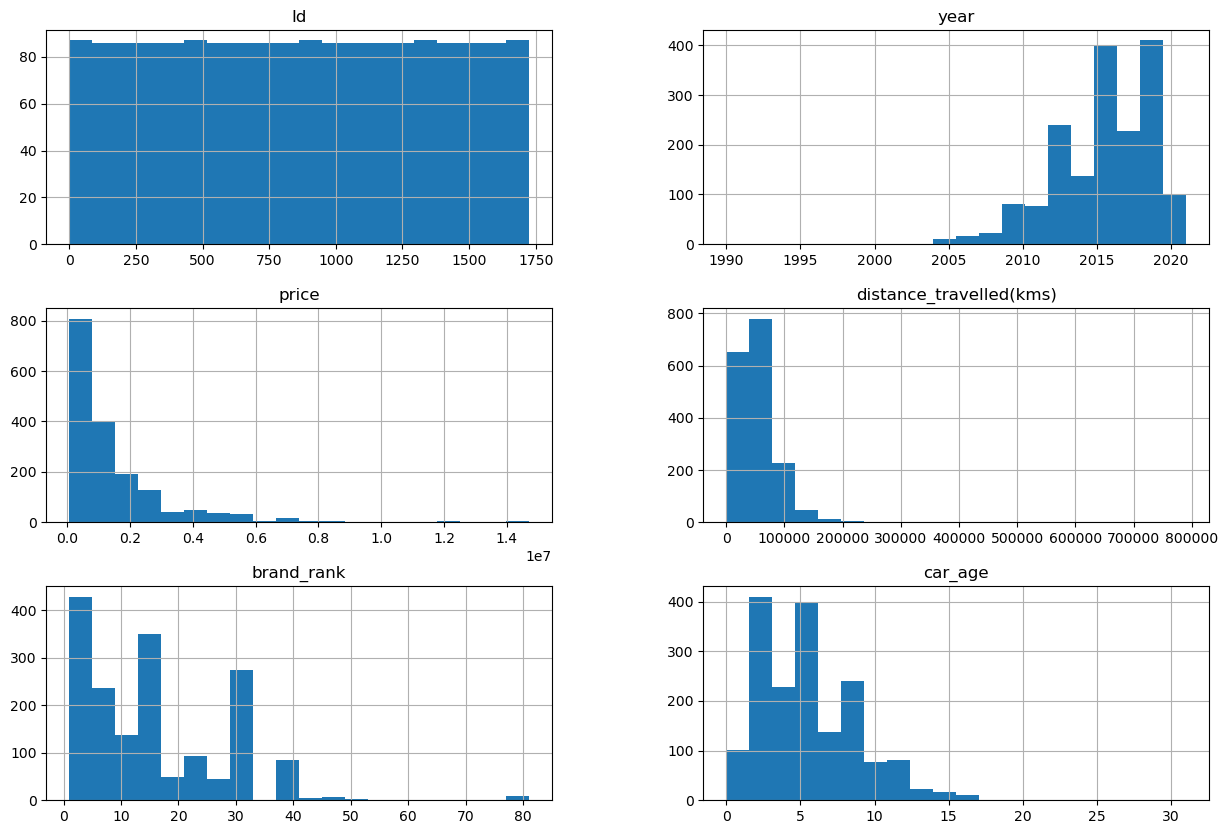

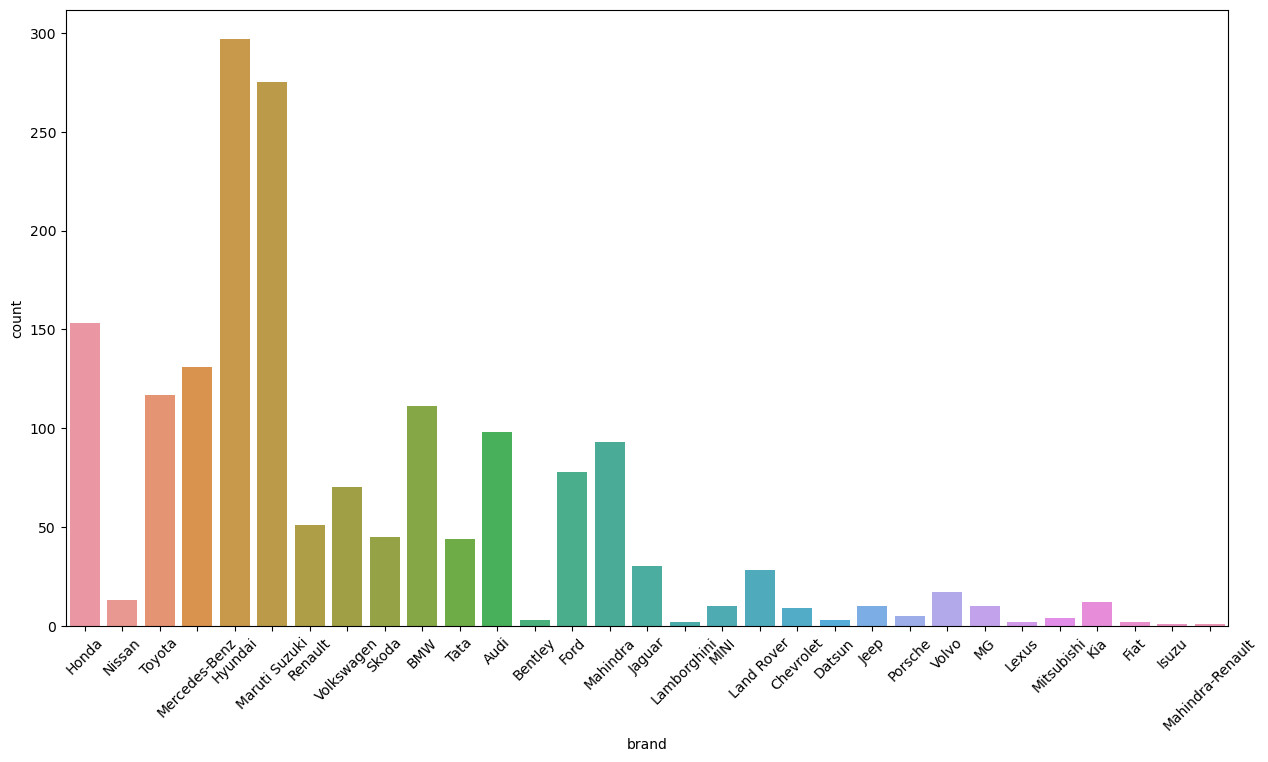

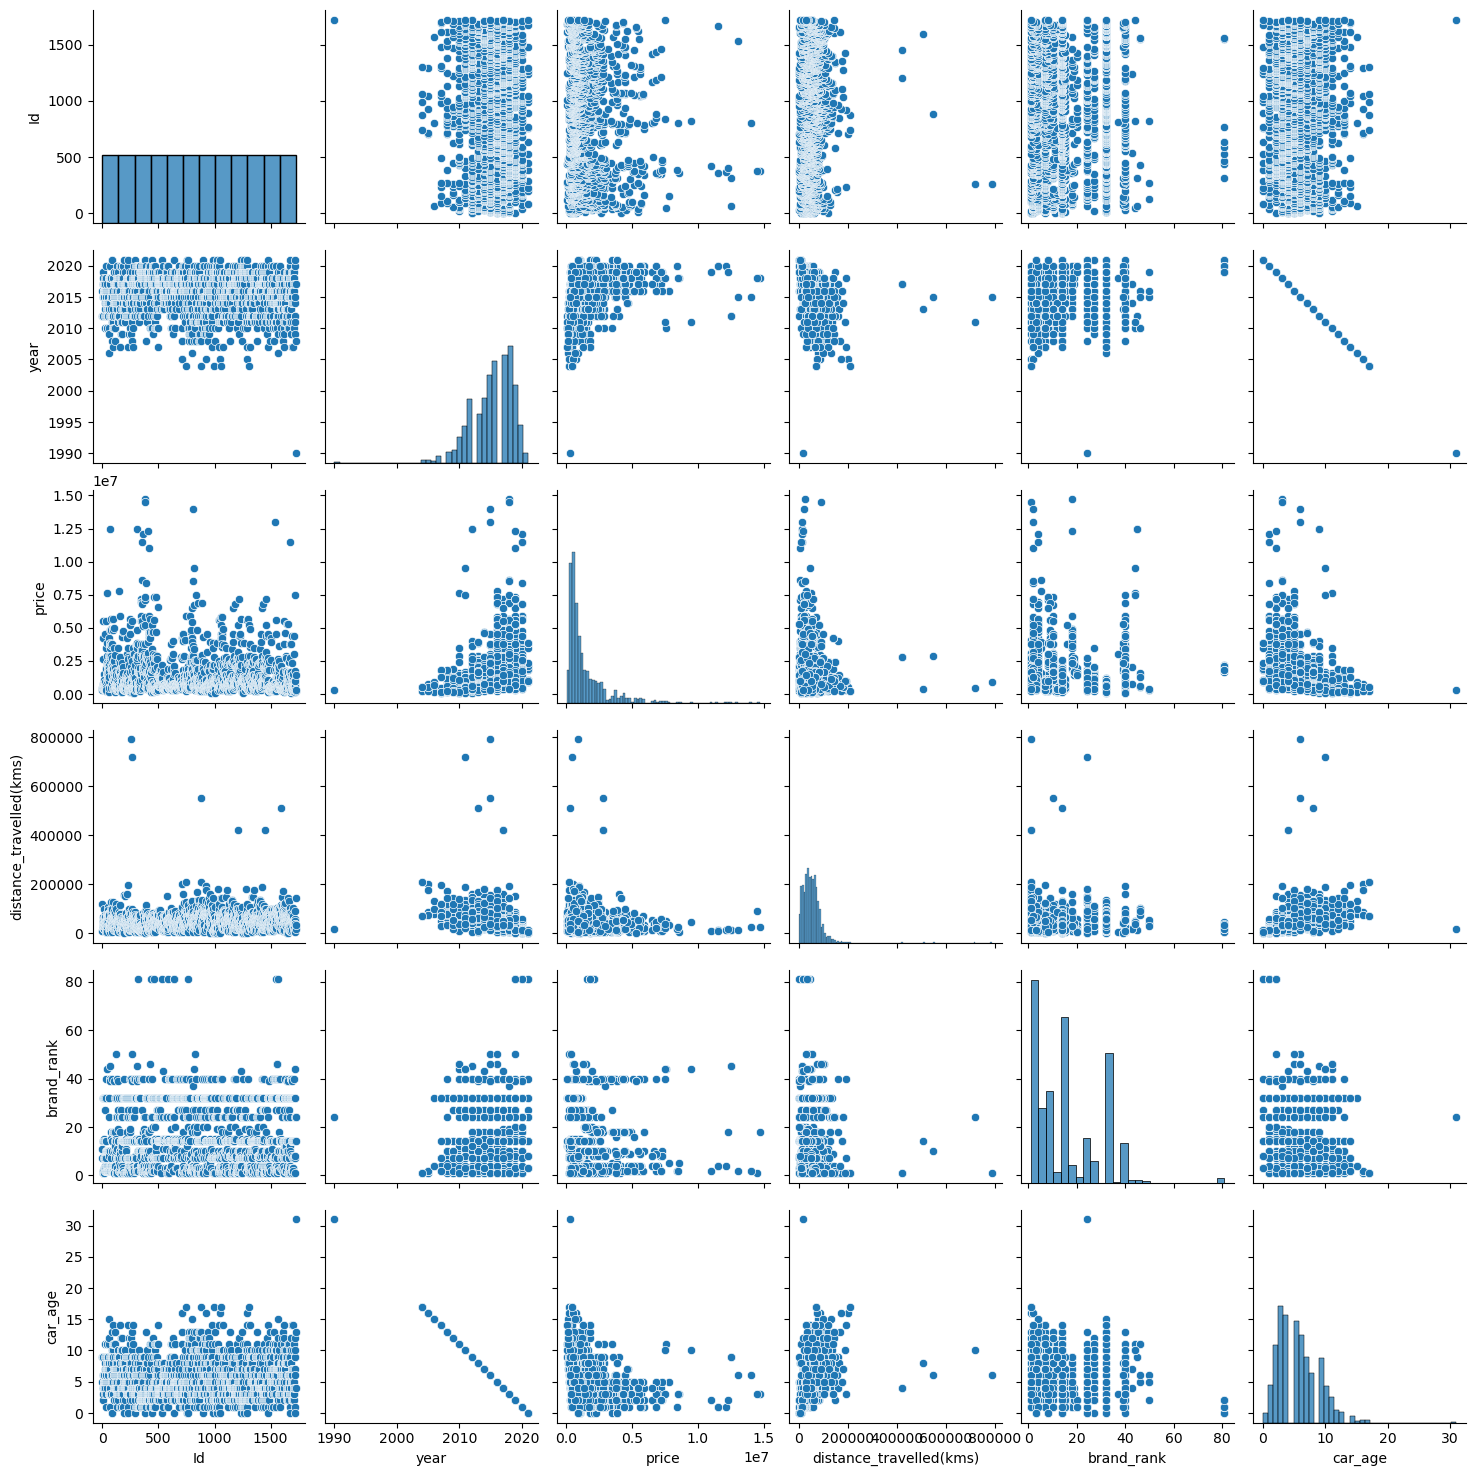

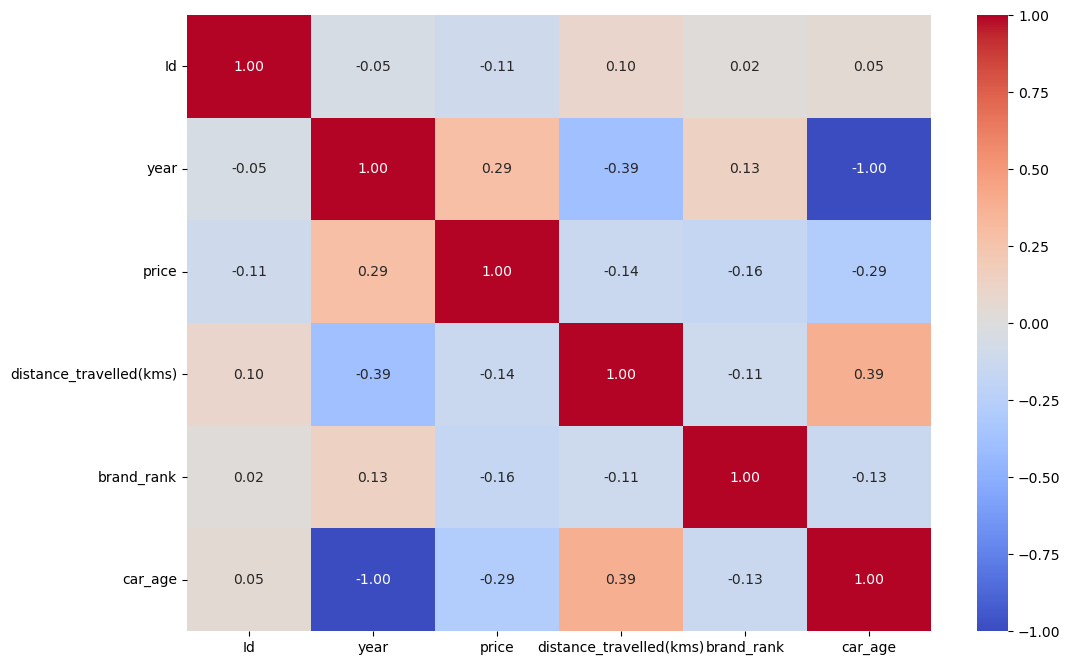

Mean Squared Error: 969871474045.3798
R-squared: 0.7110910161087534
Random Forest Mean Squared Error: 877624513101.0891
Linear Regression Mean Squared Error: 1010308900617.0104


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_csv('cars.csv')

# Summary statistics
print(df.describe())

# Histograms for numeric features
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Count plots for categorical features
plt.figure(figsize=(15, 8))
sns.countplot(x='brand', data=df)
plt.xticks(rotation=45)
plt.show()

# Pairplot to visualize relationships between numeric features
sns.pairplot(df)
plt.show()

# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Define features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = ['year', 'distance_travelled(kms)', 'car_age']
categorical_features = ['brand', 'full_model_name', 'model_name', 'fuel_type', 'city']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Compare with a simple Linear Regression model
linear_reg = LinearRegression()
linear_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('model', linear_reg)])

# Cross-validate both models
rf_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
lr_scores = cross_val_score(linear_reg_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Display results
print(f'Random Forest Mean Squared Error: {-np.mean(rf_scores)}')
print(f'Linear Regression Mean Squared Error: {-np.mean(lr_scores)}')

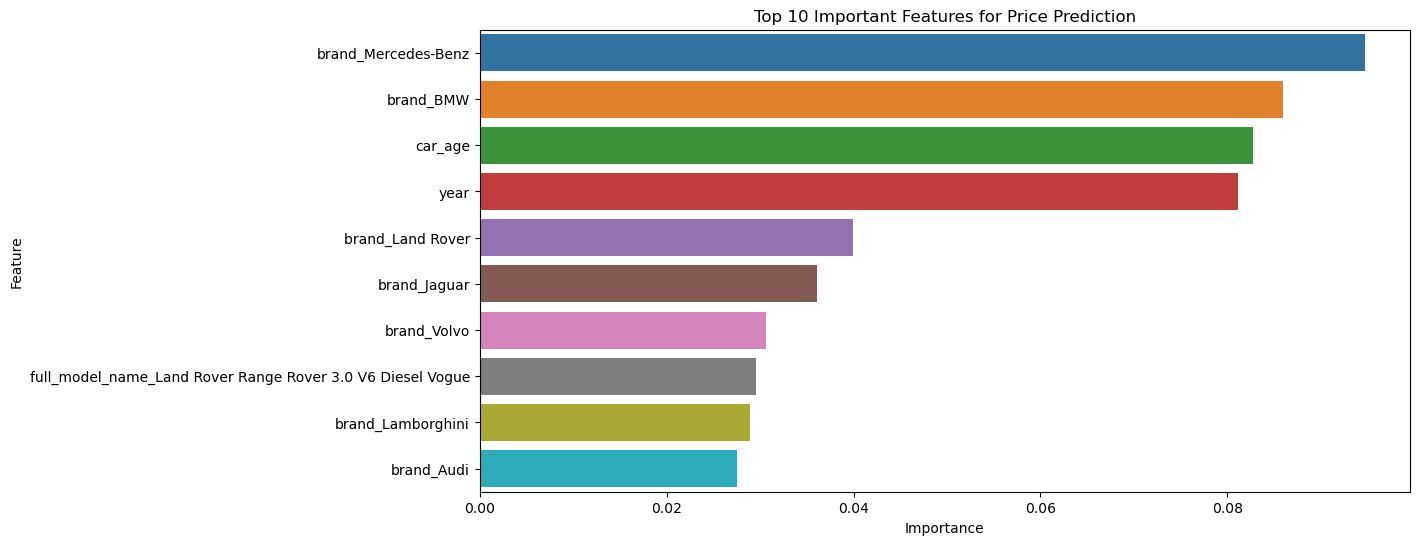

Feature Importance:
                                               Feature    Importance
23                                 brand_Mercedes-Benz  9.475748e-02
4                                            brand_BMW  8.592481e-02
2                                              car_age  8.269336e-02
0                                                 year  8.115635e-02
16                                    brand_Land Rover  3.993499e-02
..                                                 ...           ...
473    full_model_name_Maruti Suzuki Vitara Brezza LDi  1.811952e-08
252  full_model_name_Hyundai Grand i10 Sportz U2 1....  7.148925e-09
285           full_model_name_Hyundai i10 Magna 1.2 AT  6.066487e-09
482  full_model_name_Maruti Suzuki Wagon R 1.0 LXi CNG  4.844484e-09
567  full_model_name_Renault Kwid 1.0 RXL AMT [2017...  0.000000e+00

[885 rows x 2 columns]


In [23]:
# Fit the model
pipeline.fit(X_train, y_train)

# Get feature names after one-hot encoding
feature_names = (pipeline.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features)
                 .tolist())

# Combine numerical and categorical feature names
all_feature_names = numerical_features + feature_names

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_features = 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_features))
plt.title(f'Top {top_features} Important Features for Price Prediction')
plt.show()

# Display the feature importance DataFrame
print("Feature Importance:")
print(feature_importance_df)